In [1]:
import numpy as np
import pandas as pd
import mlflow
from serotiny.io.image import image_loader
import matplotlib.pyplot as plt

20-Oct-22 12:48:29 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


In [2]:
import os
os.chdir("/home/aicsuser/cytodata-hackathon-base")

In [3]:
df_mitocells = pd.read_csv('/home/aicsuser/serotiny_data/mitocells.csv')

In [4]:
df_mitocells.cell_stage.drop_duplicates()

0                  M0
2000             M1M2
4000               M3
4981             M4M5
6981    M6M7_complete
Name: cell_stage, dtype: object

/opt/conda/lib/python3.10/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/opt/conda/lib/python3.10/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/opt/conda/lib/python3.10/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, ple

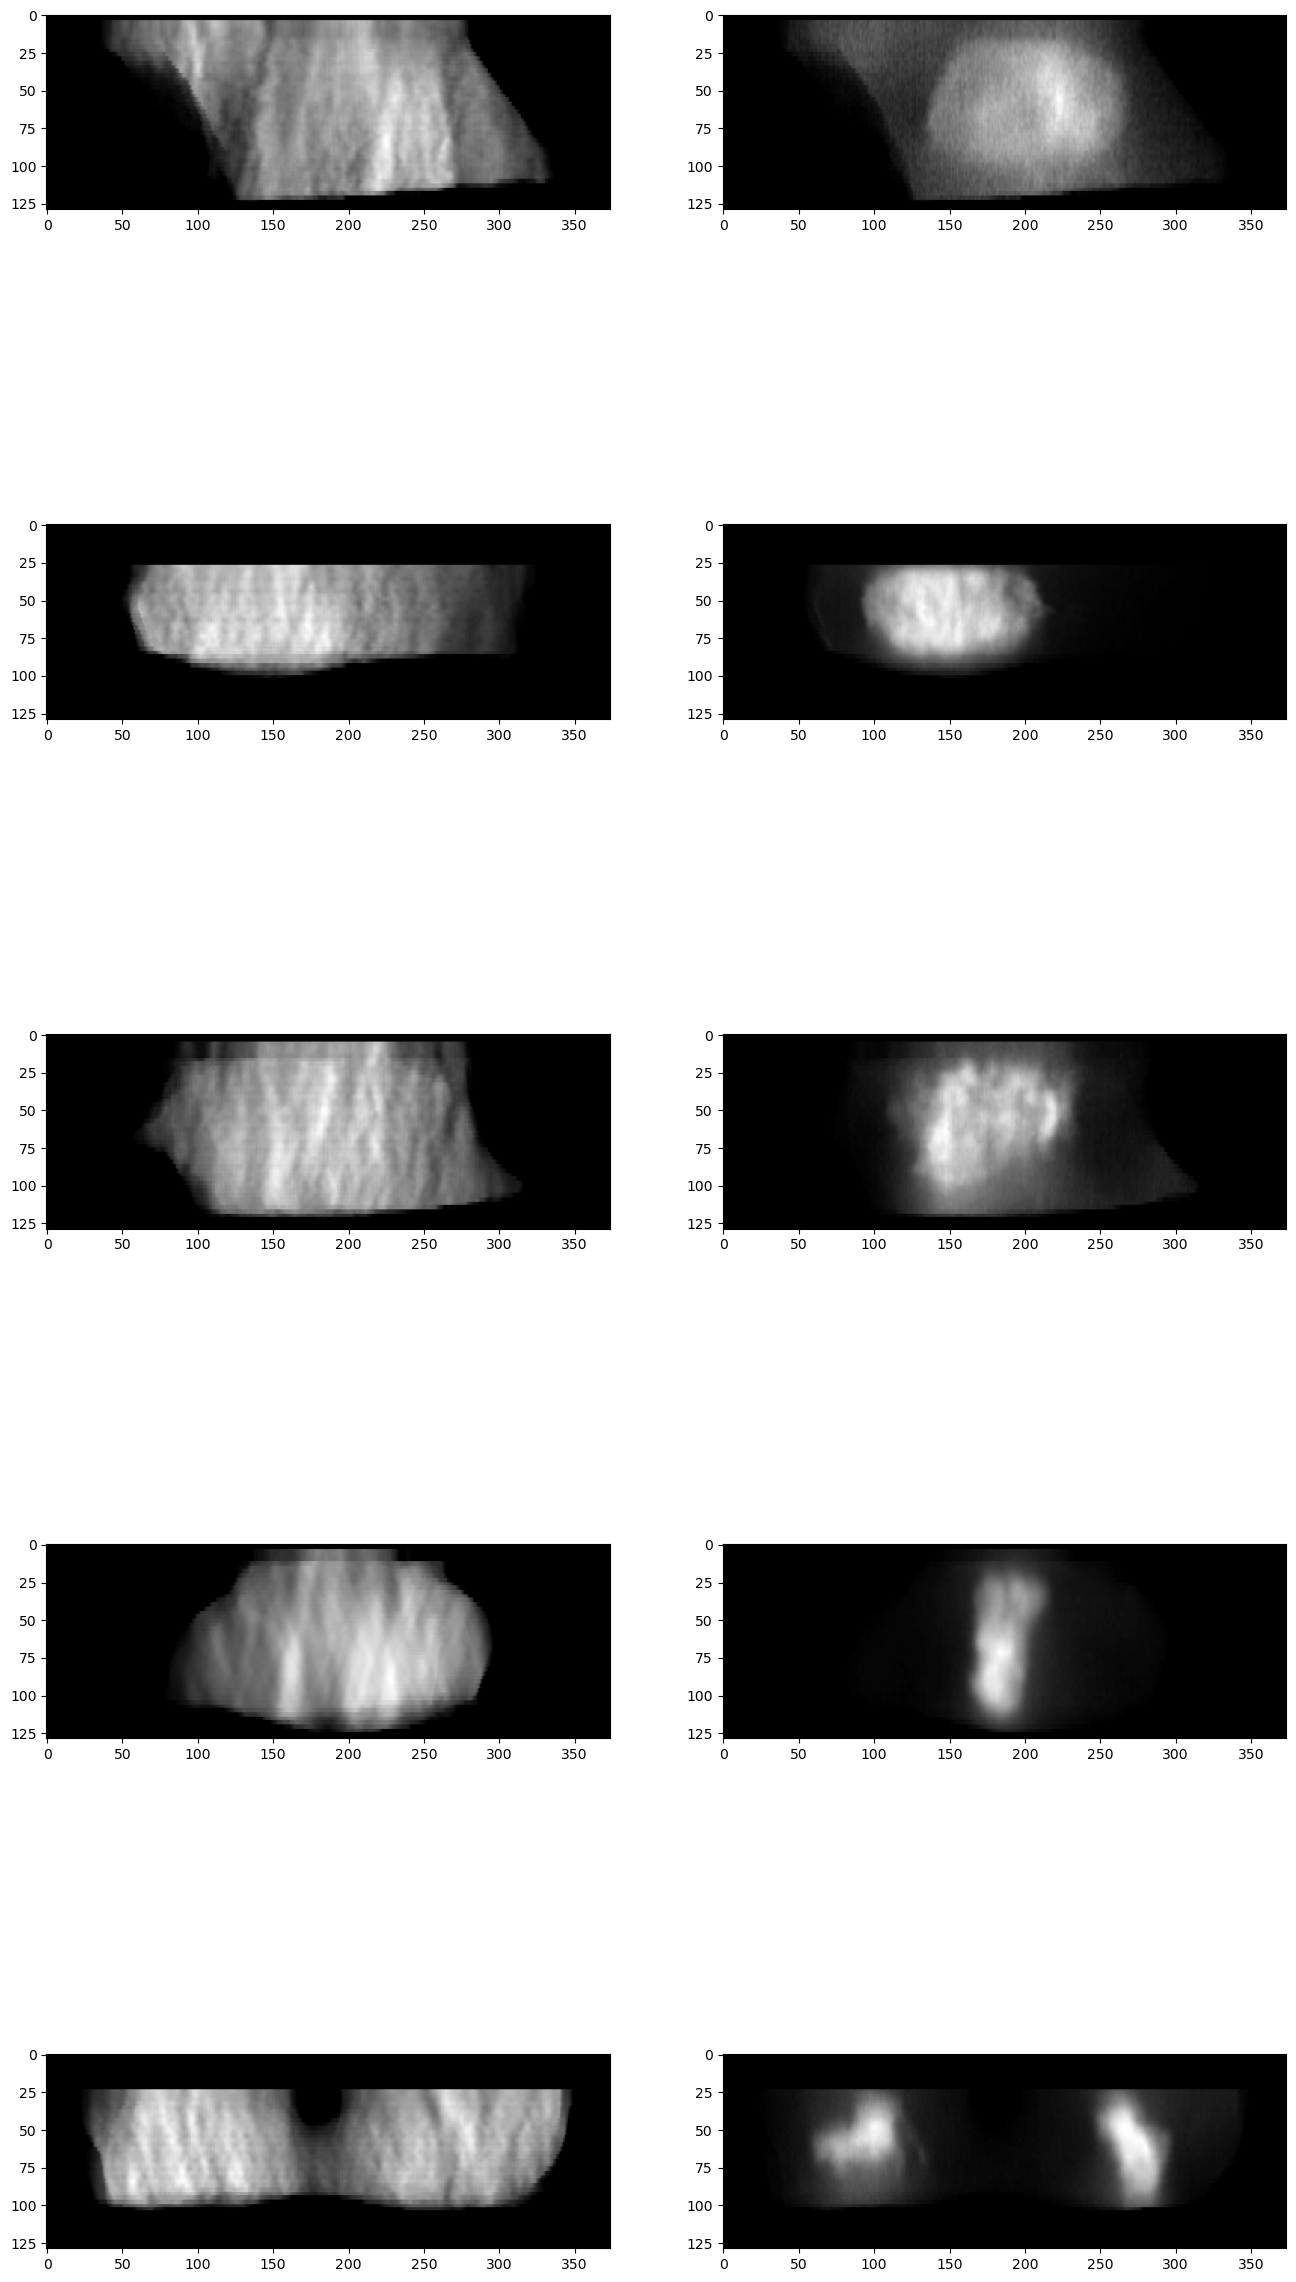

In [9]:
fig,ax = plt.subplots(5, 2, figsize=(16,32))
for y,ind in enumerate([0,2000,4000,5000,7000]):
    full_img = image_loader(df_mitocells.loc[ind,'mean_projection_y'])
    full_img = full_img[:2,:,:]
    full_img = (full_img / 65535.0 * 255.0).astype(np.uint8)
    for i in range(2):
        ax[y,i].imshow(full_img[i,:,:,], cmap='gray')

In [6]:
from datetime import datetime

# util to avoid referring to the same run unintentionally
now_str = lambda : datetime.now().strftime("%Y%m%d_%H%M%S")

In [10]:
full_img.shape

(2, 129, 374)

In [ ]:
run_name = f"tbd_run_{now_str()}"

!serotiny train \
    model=example_vae_2d \
    data=example_vae_dataloader_2d \
    mlflow.experiment_name=tbd \
    mlflow.run_name={run_name} \
    trainer.gpus=[0] \
    trainer.max_epochs=20

[2022-10-20 01:23:02,042][pytorch_lightning.utilities.seed][INFO] - Global seed set to 42
[2022-10-20 01:23:02,043][serotiny.ml_ops.ml_ops][INFO] - Instantiating datamodule
[2022-10-20 01:23:04,575][serotiny.ml_ops.ml_ops][INFO] - Instantiating trainer
[2022-10-20 01:23:04,641][pytorch_lightning.utilities.rank_zero][INFO] - GPU available: True, used: True
[2022-10-20 01:23:04,641][pytorch_lightning.utilities.rank_zero][INFO] - TPU available: False, using: 0 TPU cores
[2022-10-20 01:23:04,642][pytorch_lightning.utilities.rank_zero][INFO] - IPU available: False, using: 0 IPUs
[2022-10-20 01:23:04,642][pytorch_lightning.utilities.rank_zero][INFO] - HPU available: False, using: 0 HPUs
[2022-10-20 01:23:04,642][serotiny.ml_ops.ml_ops][INFO] - Instantiating model
[2022-10-20 01:23:04,672][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 41496 for CNN
[2022-10-20 01:23:05,612][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 89012 for CN

In [7]:
!serotiny test \
    model=example_vae_2d \
    data=example_vae_dataloader_2d \
    mlflow.experiment_name=tbd \
    mlflow.run_name='tbd_run_20221020_012258' \
    trainer/callbacks=vae \
    ++force=True

[2022-10-20 06:09:15,718][pytorch_lightning.utilities.seed][INFO] - Global seed set to 42
[2022-10-20 06:09:15,719][serotiny.ml_ops.ml_ops][INFO] - Instantiating datamodule
[2022-10-20 06:09:18,269][serotiny.ml_ops.ml_ops][INFO] - Instantiating trainer
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
[2022-10-20 06:09:18,436][pytorch_lightning.utilities.rank_zero][INFO] - GPU available: True, used: False
[2022-10-20 06:09:18,436][pytorch_lightning.utilities.rank_zero][INFO] - TPU available: False, using: 0 TPU cores
[2022-10-20 06:09:18,437][pytorch_lightning.utilities.rank_zero][INFO] - IPU available: False, using: 0 IPUs
[2022-10-20 06:09:18,437][pytorch_lightning.utilities.rank_zero][INFO] - HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1812:

In [9]:
from serotiny.ml_ops.mlflow_utils import download_artifact

mlflow.set_tracking_uri("http://mlflow.mlflow.svc.cluster.local")

with download_artifact("dataframes/embeddings.csv", experiment_name="tbd", run_name='tbd_run_20221020_012258') as path:
    embeddings = pd.read_csv(path)
    
with download_artifact("dataframes/stats_per_dim_test.csv", experiment_name="tbd", run_name='tbd_run_20221020_012258') as path:
    kl_per_dimension = pd.read_csv(path)

/opt/conda/lib/python3.10/site-packages/serotiny/ml_ops/mlflow_utils.py:144: FutureWarning: ``mlflow.tracking.fluent.list_experiments`` is deprecated. This method will be removed in a future release. Use ``search_experiments()`` instead.
  for _experiment in mlflow.list_experiments():
/opt/conda/lib/python3.10/site-packages/mlflow/tracking/fluent.py:1066: FutureWarning: ``mlflow.tracking.client.MlflowClient.list_experiments`` is deprecated. This method will be removed in a future release. Use ``search_experiments()`` instead.
  return MlflowClient().list_experiments(
/opt/conda/lib/python3.10/site-packages/serotiny/ml_ops/mlflow_utils.py:156: FutureWarning: ``mlflow.tracking.fluent.list_run_infos`` is deprecated. This method will be removed in a future release. Use ``search_runs()`` instead.
  for run_info in mlflow.list_run_infos(experiment_id=experiment_id):
/opt/conda/lib/python3.10/site-packages/mlflow/tracking/fluent.py:1599: FutureWarning: ``mlflow.tracking.client.MlflowClient.li

In [11]:
embeddings.to_csv('slice_embed.csv')
kl_per_dimension.to_csv('slice_kl.csv')

In [16]:
feat = embeddings[[x for x in embeddings.columns if 'mu' in x]]
feat = feat.iloc[:df_mitocells.shape[0], :]

In [19]:
import umap
import sklearn.preprocessing

In [20]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(feat)
feat = scaler.transform(feat)

In [21]:
mapper = umap.UMAP()
mapper.fit(feat)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [25]:
import seaborn as sns

<AxesSubplot: >

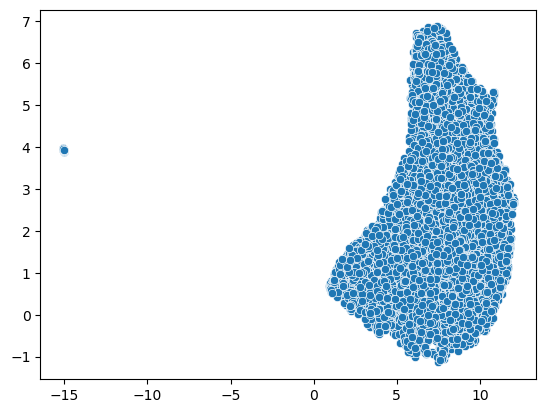

In [29]:
sns.scatterplot(x=mapper.embedding_[:,0], y=mapper.embedding_[:,1])

In [7]:
run_name = f"tbd_run_meanx"

!serotiny train \
    model=vae_2d_meanx \
    data=vae_dataloader_2d_meanx \
    mlflow.experiment_name=tbd \
    mlflow.run_name={run_name} \
    trainer.gpus=[0] \
    trainer.max_epochs=20

[2022-10-20 12:51:56,117][pytorch_lightning.utilities.seed][INFO] - Global seed set to 42
[2022-10-20 12:51:56,118][serotiny.ml_ops.ml_ops][INFO] - Instantiating datamodule
[2022-10-20 12:51:58,630][serotiny.ml_ops.ml_ops][INFO] - Instantiating trainer
[2022-10-20 12:51:58,683][pytorch_lightning.utilities.rank_zero][INFO] - GPU available: True, used: True
[2022-10-20 12:51:58,683][pytorch_lightning.utilities.rank_zero][INFO] - TPU available: False, using: 0 TPU cores
[2022-10-20 12:51:58,683][pytorch_lightning.utilities.rank_zero][INFO] - IPU available: False, using: 0 IPUs
[2022-10-20 12:51:58,684][pytorch_lightning.utilities.rank_zero][INFO] - HPU available: False, using: 0 HPUs
[2022-10-20 12:51:58,684][serotiny.ml_ops.ml_ops][INFO] - Instantiating model
[2022-10-20 12:51:58,712][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 13452 for CNN
[2022-10-20 12:51:59,023][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 30702 for CN

In [ ]:
run_name = f"tbd_run_meany"

!serotiny train \
    model=vae_2d_meany \
    data=vae_dataloader_2d_meany \
    mlflow.experiment_name=tbd \
    mlflow.run_name={run_name} \
    trainer.gpus=[0] \
    trainer.max_epochs=20

[2022-10-20 15:27:05,615][pytorch_lightning.utilities.seed][INFO] - Global seed set to 42
[2022-10-20 15:27:05,616][serotiny.ml_ops.ml_ops][INFO] - Instantiating datamodule
[2022-10-20 15:27:08,226][serotiny.ml_ops.ml_ops][INFO] - Instantiating trainer
[2022-10-20 15:27:08,282][pytorch_lightning.utilities.rank_zero][INFO] - GPU available: True, used: True
[2022-10-20 15:27:08,282][pytorch_lightning.utilities.rank_zero][INFO] - TPU available: False, using: 0 TPU cores
[2022-10-20 15:27:08,282][pytorch_lightning.utilities.rank_zero][INFO] - IPU available: False, using: 0 IPUs
[2022-10-20 15:27:08,282][pytorch_lightning.utilities.rank_zero][INFO] - HPU available: False, using: 0 HPUs
[2022-10-20 15:27:08,282][serotiny.ml_ops.ml_ops][INFO] - Instantiating model
[2022-10-20 15:27:08,311][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 21476 for CNN
[2022-10-20 15:27:08,796][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 48246 for CN

In [ ]:
run_name = f"tbd_run_meanz"

!serotiny train \
    model=vae_2d_meanz \
    data=vae_dataloader_2d_meanz \
    mlflow.experiment_name=tbd \
    mlflow.run_name={run_name} \
    trainer.gpus=[0] \
    trainer.max_epochs=20

[2022-10-20 06:28:58,265][pytorch_lightning.utilities.seed][INFO] - Global seed set to 42
[2022-10-20 06:28:58,266][serotiny.ml_ops.ml_ops][INFO] - Instantiating datamodule
[2022-10-20 06:29:00,786][serotiny.ml_ops.ml_ops][INFO] - Instantiating trainer
[2022-10-20 06:29:00,841][pytorch_lightning.utilities.rank_zero][INFO] - GPU available: True, used: True
[2022-10-20 06:29:00,841][pytorch_lightning.utilities.rank_zero][INFO] - TPU available: False, using: 0 TPU cores
[2022-10-20 06:29:00,841][pytorch_lightning.utilities.rank_zero][INFO] - IPU available: False, using: 0 IPUs
[2022-10-20 06:29:00,841][pytorch_lightning.utilities.rank_zero][INFO] - HPU available: False, using: 0 HPUs
[2022-10-20 06:29:00,841][serotiny.ml_ops.ml_ops][INFO] - Instantiating model
[2022-10-20 06:29:00,872][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 41496 for CNN
[2022-10-20 06:29:01,826][serotiny.networks.basic_cnn.basic_cnn][INFO] - Determined 'compressed size': 89012 for CN